In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.cm as mcm
from cycler import cycler
import matplotlib.colors as clr
import random as rd
import json as j
%matplotlib inline

In [2]:
data=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\
Summer 2017 REU\\monthly_by_tract.csv')

In [3]:
data.columns

Index(['complaint_type', 'created_date', '1000100.0', '1000201.0', '1000202.0',
       '1000500.0', '1000600.0', '1000700.0', '1000800.0', '1000900.0',
       ...
       '5027706.0', '5027900.0', '5029102.0', '5029103.0', '5029104.0',
       '5030301.0', '5030302.0', '5031901.0', '5031902.0', '5032300.0'],
      dtype='object', length=2165)

In [5]:
calls=data.melt(id_vars=['created_date','complaint_type'],var_name='boro_ct201',
               value_name='complaint_count')

In [6]:
calls.head()

created_date      complaint_type boro_ct201  complaint_count
0   2004-01-31    Dirty Conditions  1000100.0              NaN
1   2004-01-31  Water Conservation  1000100.0              NaN
2   2004-01-31                Snow  1000100.0              NaN
3   2004-01-31       Water Quality  1000100.0              NaN
4   2004-01-31          Electrical  1000100.0              NaN

In [7]:
call_table=calls.pivot_table(index='created_date',columns='complaint_type',
                            aggfunc='sum')['complaint_count']

In [8]:
call_table.head()

complaint_type  Blocked Driveway  Building/Use  Dirty Conditions  ELECTRIC  \
created_date                                                                 
2004-01-31                   NaN        1513.0               5.0       NaN   
2004-02-29                   NaN        1577.0               1.0       NaN   
2004-03-31                   NaN        2196.0              27.0      80.0   
2004-04-30                3543.0        2238.0            1991.0    2143.0   
2004-05-31                3847.0        2286.0            2000.0    2259.0   

complaint_type  Electrical  GENERAL CONSTRUCTION  \
created_date                                       
2004-01-31           171.0                   NaN   
2004-02-29           186.0                   NaN   
2004-03-31           177.0                 255.0   
2004-04-30           176.0                5867.0   
2004-05-31           172.0                6032.0   

complaint_type  General Construction/Plumbing  HEAT/HOT WATER  HEATING  \
created_date                                                             
2004-01-31                             1998.0             NaN      NaN   
2004-02-29                             2415.0             NaN      NaN   
2004-03-31                             3009.0             NaN    506.0   
2004-04-30                             3034.0             NaN  10552.0   
2004-05-31                             3321.0             NaN   4183.0   

complaint_type  Illegal Parking      ...       Sanitation Condition   Sewer  \
created_date                         ...                                      
2004-01-31                  NaN      ...                        NaN    16.0   
2004-02-29                  NaN      ...                        NaN    23.0   
2004-03-31                  NaN      ...                      197.0    31.0   
2004-04-30                  NaN      ...                     1948.0  6353.0   
2004-05-31                  NaN      ...                     2387.0  6137.0   

complaint_type  Snow  Standing Water  Street Condition  \
created_date                                             
2004-01-31       4.0             NaN               NaN   
2004-02-29       2.0             NaN               NaN   
2004-03-31       2.0             NaN               NaN   
2004-04-30       4.0             NaN            5444.0   
2004-05-31       2.0             NaN            4348.0   

complaint_type  Street Light Condition  WATER LEAK  Water Conservation  \
created_date                                                             
2004-01-31                         2.0         NaN                 9.0   
2004-02-29                         3.0         NaN                 5.0   
2004-03-31                         1.0         NaN                 3.0   
2004-04-30                       115.0         NaN               268.0   
2004-05-31                        92.0         NaN               255.0   

complaint_type  Water Quality  Water System  
created_date                                 
2004-01-31                1.0          12.0  
2004-02-29                1.0          18.0  
2004-03-31                NaN          17.0  
2004-04-30              107.0        6274.0  
2004-05-31              223.0        6984.0  

[5 rows x 30 columns]

In [22]:
col_sorted=call_table.sum(axis=0).sort_values(ascending=False)
col_sorted.index.tolist()

['HEATING',
 'Noise - Residential',
 'PLUMBING',
 'GENERAL CONSTRUCTION',
 'Street Condition',
 'Blocked Driveway',
 'Water System',
 'PAINT - PLASTER',
 'Street Light Condition',
 'Sewer',
 'HEAT/HOT WATER',
 'NONCONST',
 'Noise',
 'General Construction/Plumbing',
 'Noise - Street/Sidewalk',
 'Illegal Parking',
 'ELECTRIC',
 'Dirty Conditions',
 'Sanitation Condition',
 'Noise - Commercial',
 'Building/Use',
 'WATER LEAK',
 'Root/Sewer/Sidewalk Condition',
 'Snow',
 'Electrical',
 'Plumbing',
 'Water Conservation',
 'Water Quality',
 'Non-Residential Heat',
 'Standing Water']

In [23]:
tci = call_table.reindex(columns=col_sorted.index.tolist())
tci.head()

complaint_type  HEATING  Noise - Residential  PLUMBING  GENERAL CONSTRUCTION  \
created_date                                                                   
2004-01-31          NaN                  NaN       NaN                   NaN   
2004-02-29          NaN                  NaN       NaN                   NaN   
2004-03-31        506.0                  NaN     275.0                 255.0   
2004-04-30      10552.0                  NaN    6281.0                5867.0   
2004-05-31       4183.0                  NaN    5763.0                6032.0   

complaint_type  Street Condition  Blocked Driveway  Water System  \
created_date                                                       
2004-01-31                   NaN               NaN          12.0   
2004-02-29                   NaN               NaN          18.0   
2004-03-31                   NaN               NaN          17.0   
2004-04-30                5444.0            3543.0        6274.0   
2004-05-31                4348.0            3847.0        6984.0   

complaint_type  PAINT - PLASTER  Street Light Condition   Sewer  \
created_date                                                      
2004-01-31                  NaN                     2.0    16.0   
2004-02-29                  NaN                     3.0    23.0   
2004-03-31                231.0                     1.0    31.0   
2004-04-30               4286.0                   115.0  6353.0   
2004-05-31               4379.0                    92.0  6137.0   

complaint_type       ...        Building/Use  WATER LEAK  \
created_date         ...                                   
2004-01-31           ...              1513.0         NaN   
2004-02-29           ...              1577.0         NaN   
2004-03-31           ...              2196.0         NaN   
2004-04-30           ...              2238.0         NaN   
2004-05-31           ...              2286.0         NaN   

complaint_type  Root/Sewer/Sidewalk Condition  Snow  Electrical  Plumbing  \
created_date                                                                
2004-01-31                                NaN   4.0       171.0     177.0   
2004-02-29                                NaN   2.0       186.0     165.0   
2004-03-31                                NaN   2.0       177.0     164.0   
2004-04-30                                NaN   4.0       176.0     198.0   
2004-05-31                                NaN   2.0       172.0     200.0   

complaint_type  Water Conservation  Water Quality  Non-Residential Heat  \
created_date                                                              
2004-01-31                     9.0            1.0                   NaN   
2004-02-29                     5.0            1.0                   NaN   
2004-03-31                     3.0            NaN                   NaN   
2004-04-30                   268.0          107.0                   NaN   
2004-05-31                   255.0          223.0                   NaN   

complaint_type  Standing Water  
created_date                    
2004-01-31                 NaN  
2004-02-29                 NaN  
2004-03-31                 NaN  
2004-04-30                 NaN  
2004-05-31                 NaN  

[5 rows x 30 columns]

In [24]:
colorList = ['Tomato', 'Silver', 'GreenYellow', 'LightCoral', 'Violet', 'MediumVioletRed', 'DarkSalmon', 'Goldenrod', 'Beige', 'Sienna', 'MediumBlue', 'Lavender', 'FireBrick', 'SlateBlue', 'Yellow', 'Gold', 
            'Cornsilk', 'DarkTurquoise', 'DarkMagenta', 'Orchid', 'LightSeaGreen', 'cyan', 'Thistle', 'Pink', 'Magenta', 'Maroon', 'RoyalBlue', 'DarkOrchid', 'OldLace', 'Plum']

In [25]:
colorList_a = []
for i, c in enumerate(colorList):
    iC = c
    alpha = 1
    print(call_table.columns[i])
    if i == 8:
        iC = '#BC3B39'
    elif i == 21:
        iC = '#78AF49'
    else:
        alpha = .5
    colorList_a.append(clr.to_rgba(iC, alpha=alpha))

Blocked Driveway
Building/Use
Dirty Conditions
ELECTRIC
Electrical
GENERAL CONSTRUCTION
General Construction/Plumbing
HEAT/HOT WATER
HEATING
Illegal Parking
NONCONST
Noise
Noise - Commercial
Noise - Residential
Noise - Street/Sidewalk
Non-Residential Heat
PAINT - PLASTER
PLUMBING
Plumbing
Root/Sewer/Sidewalk Condition
Sanitation Condition
Sewer
Snow
Standing Water
Street Condition
Street Light Condition
WATER LEAK
Water Conservation
Water Quality
Water System


In [30]:
colorList_a

[(1.0, 0.38823529411764707, 0.2784313725490196, 0.5),
 (0.7529411764705882, 0.7529411764705882, 0.7529411764705882, 0.5),
 (0.6784313725490196, 1.0, 0.1843137254901961, 0.5),
 (0.9411764705882353, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.9333333333333333, 0.5098039215686274, 0.9333333333333333, 0.5),
 (0.7803921568627451, 0.08235294117647059, 0.5215686274509804, 0.5),
 (0.9137254901960784, 0.5882352941176471, 0.47843137254901963, 0.5),
 (0.8549019607843137, 0.6470588235294118, 0.12549019607843137, 0.5),
 (0.7372549019607844, 0.23137254901960785, 0.2235294117647059, 1),
 (0.6274509803921569, 0.3215686274509804, 0.17647058823529413, 0.5),
 (0.0, 0.0, 0.803921568627451, 0.5),
 (0.9019607843137255, 0.9019607843137255, 0.9803921568627451, 0.5),
 (0.6980392156862745, 0.13333333333333333, 0.13333333333333333, 0.5),
 (0.41568627450980394, 0.35294117647058826, 0.803921568627451, 0.5),
 (1.0, 1.0, 0.0, 0.5),
 (1.0, 0.8431372549019608, 0.0, 0.5),
 (1.0, 0.9725490196078431, 0.862745098039

In [26]:
colorDict = dict(zip(call_table.columns, colorList_a))

with open('data.json', 'w') as fp:
    j.dump(colorDict, fp)

In [27]:
call_table['2014':]

complaint_type  Blocked Driveway  Building/Use  Dirty Conditions  ELECTRIC  \
created_date                                                                 
2014-01-31                5676.0        1926.0            2029.0    3445.0   
2014-02-28                8188.0        1884.0            1745.0    3054.0   
2014-03-31                6177.0        2362.0            2762.0    2594.0   
2014-04-30                5339.0        2154.0            2663.0    2226.0   
2014-05-31                6000.0        2236.0            2819.0    2232.0   
2014-06-30                6542.0        2483.0            3474.0    2244.0   
2014-07-31                5963.0        2613.0            3387.0    2754.0   
2014-08-31                5805.0        2429.0            3059.0    2257.0   
2014-09-30                6939.0        2306.0            3271.0    2390.0   
2014-10-31                7216.0        2303.0            2748.0    2488.0   
2014-11-30                7444.0        1853.0            2021.0    2321.0   
2014-12-31                7811.0        1828.0            2171.0    2384.0   
2015-01-31                7220.0        1704.0            1898.0    2513.0   
2015-02-28                8271.0        1441.0            1659.0    2525.0   
2015-03-31                9003.0        1832.0            3570.0    2518.0   
2015-04-30                6850.0        1924.0            2810.0    2185.0   
2015-05-31                8052.0        2355.0            3042.0    2178.0   
2015-06-30                8555.0        2496.0            3017.0    2498.0   
2015-07-31                7622.0        2450.0            4051.0    2953.0   
2015-08-31                7727.0        2407.0            3530.0    2827.0   
2015-09-30                8658.0        2243.0            3359.0    2504.0   
2015-10-31                9396.0        2236.0            2474.0    2698.0   
2015-11-30                9635.0        1939.0            2131.0    2428.0   
2015-12-31                9511.0        1916.0            2261.0    2291.0   
2016-01-31               10086.0        1802.0            1970.0    2488.0   
2016-02-29                8182.0        1866.0            2357.0    2315.0   
2016-03-31                9101.0        2185.0            2609.0    2129.0   
2016-04-30                8876.0        2112.0            2474.0    1751.0   
2016-05-31                9472.0        2275.0            2838.0    1943.0   
2016-06-30               10353.0        2400.0            3464.0    2131.0   
2016-07-31                9460.0        2533.0            3600.0    2754.0   
2016-08-31                9213.0        2606.0            3750.0    3203.0   
2016-09-30               10773.0        2519.0            3273.0    2149.0   
2016-10-31               10492.0        2344.0            2540.0    2412.0   
2016-11-30               11154.0        2233.0            2190.0    2211.0   
2016-12-31               11410.0        2038.0            2163.0    2505.0   
2017-01-31               10754.0        2173.0            2282.0    2599.0   
2017-02-28                9340.0        1981.0            2602.0    2332.0   
2017-03-31               12120.0        2090.0            2740.0    2181.0   
2017-04-30                9842.0        2228.0            2980.0    1936.0   
2017-05-31               10932.0        2676.0            2925.0    1964.0   
2017-06-30               11883.0        2634.0            3251.0    2154.0   
2017-07-31                8269.0        1939.0            2671.0    1717.0   

complaint_type  Electrical  GENERAL CONSTRUCTION  \
created_date                                       
2014-01-31           383.0               10372.0   
2014-02-28           335.0                5497.0   
2014-03-31           608.0                  15.0   
2014-04-30           317.0                   NaN   
2014-05-31           294.0                   NaN   
2014-06-30           318.0                   NaN   
2014-07-31           328.0                   NaN   
2014-08-31           

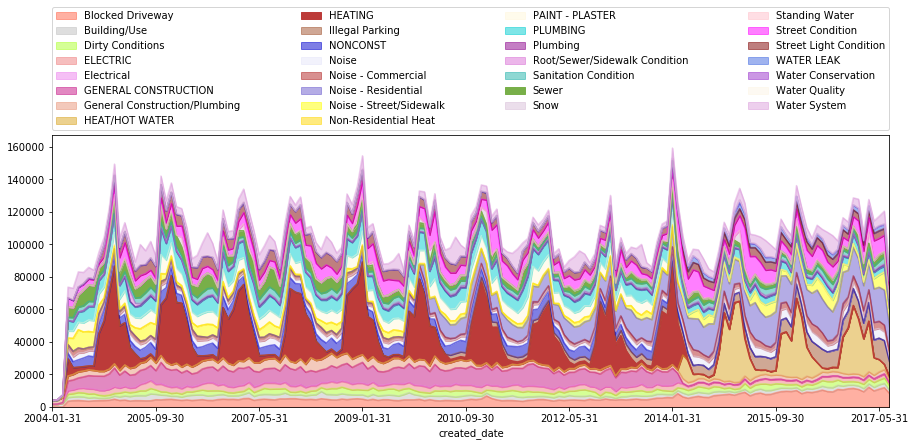

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
call_table.plot.area(color=colorList_a, ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=4, mode="expand", borderaxespad=0.)

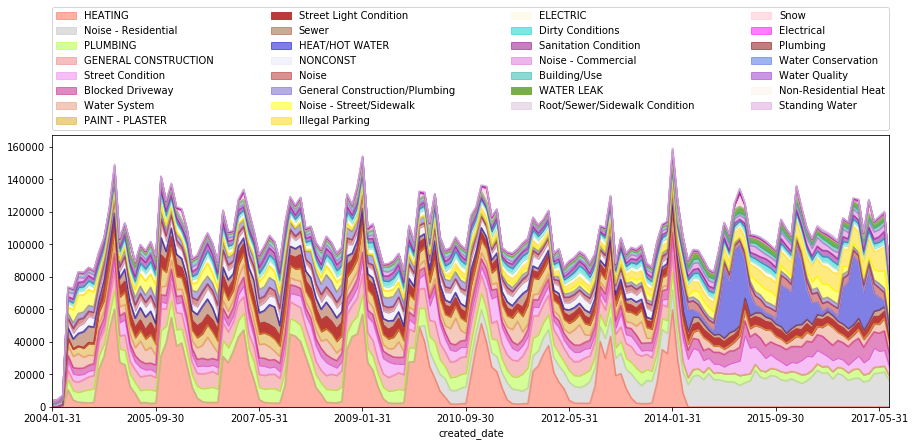

In [77]:
fig, ax = plt.subplots(figsize=(15,5))
tci.plot.area(color=colorDict.values(), ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0.)

In [73]:
colorList_a

[(1.0, 0.38823529411764707, 0.2784313725490196, 0.5),
 (0.7529411764705882, 0.7529411764705882, 0.7529411764705882, 0.5),
 (0.6784313725490196, 1.0, 0.1843137254901961, 0.5),
 (0.9411764705882353, 0.5019607843137255, 0.5019607843137255, 0.5),
 (0.9333333333333333, 0.5098039215686274, 0.9333333333333333, 0.5),
 (0.7803921568627451, 0.08235294117647059, 0.5215686274509804, 0.5),
 (0.9137254901960784, 0.5882352941176471, 0.47843137254901963, 0.5),
 (0.8549019607843137, 0.6470588235294118, 0.12549019607843137, 0.5),
 (0.7372549019607844, 0.23137254901960785, 0.2235294117647059, 1),
 (0.6274509803921569, 0.3215686274509804, 0.17647058823529413, 0.5),
 (0.0, 0.0, 0.803921568627451, 0.5),
 (0.9019607843137255, 0.9019607843137255, 0.9803921568627451, 0.5),
 (0.6980392156862745, 0.13333333333333333, 0.13333333333333333, 0.5),
 (0.41568627450980394, 0.35294117647058826, 0.803921568627451, 0.5),
 (1.0, 1.0, 0.0, 0.5),
 (1.0, 0.8431372549019608, 0.0, 0.5),
 (1.0, 0.9725490196078431, 0.862745098039

In [56]:
tci.columns

Index(['HEATING', 'Noise - Residential', 'PLUMBING', 'GENERAL CONSTRUCTION',
       'Street Condition', 'Blocked Driveway', 'Water System',
       'PAINT - PLASTER', 'Street Light Condition', 'Sewer', 'HEAT/HOT WATER',
       'NONCONST', 'Noise', 'General Construction/Plumbing',
       'Noise - Street/Sidewalk', 'Illegal Parking', 'ELECTRIC',
       'Dirty Conditions', 'Sanitation Condition', 'Noise - Commercial',
       'Building/Use', 'WATER LEAK', 'Root/Sewer/Sidewalk Condition', 'Snow',
       'Electrical', 'Plumbing', 'Water Conservation', 'Water Quality',
       'Non-Residential Heat', 'Standing Water'],
      dtype='object', name='complaint_type')

In [62]:
tci.columns

Index(['HEATING', 'Noise - Residential', 'PLUMBING', 'GENERAL CONSTRUCTION',
       'Street Condition', 'Blocked Driveway', 'Water System',
       'PAINT - PLASTER', 'Street Light Condition', 'Sewer', 'HEAT/HOT WATER',
       'NONCONST', 'Noise', 'General Construction/Plumbing',
       'Noise - Street/Sidewalk', 'Illegal Parking', 'ELECTRIC',
       'Dirty Conditions', 'Sanitation Condition', 'Noise - Commercial',
       'Building/Use', 'WATER LEAK', 'Root/Sewer/Sidewalk Condition', 'Snow',
       'Electrical', 'Plumbing', 'Water Conservation', 'Water Quality',
       'Non-Residential Heat', 'Standing Water'],
      dtype='object', name='complaint_type')

In [65]:
colorDict[tci.columns[0]]

(0.7372549019607844, 0.23137254901960785, 0.2235294117647059, 1)

In [70]:
len(tci.columns)

30

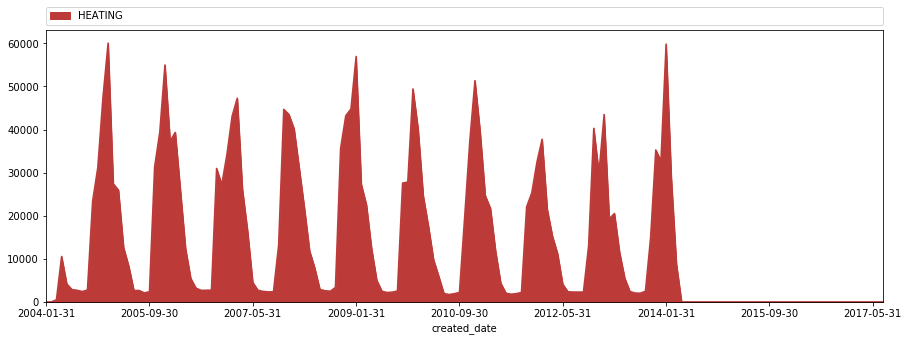

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
tci['HEATING'].plot.area(color=colorDict[tci.columns[0]], ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0.)

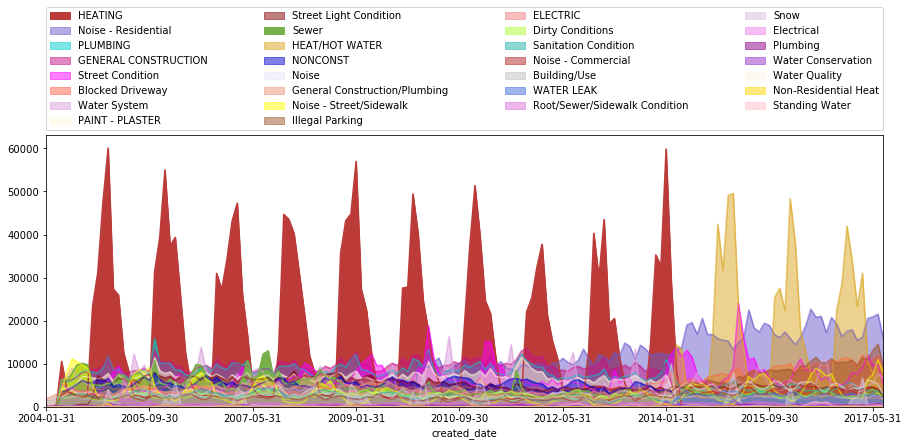

In [83]:
fig, ax = plt.subplots(figsize=(15,5))
for i,c in enumerate(tci.columns):
    tci[c].plot.area(color=colorDict[tci.columns[i]], ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0.)

In [82]:
for i,c in enumerate(tci.columns):
    print(i,c)

0 HEATING
1 Noise - Residential
2 PLUMBING
3 GENERAL CONSTRUCTION
4 Street Condition
5 Blocked Driveway
6 Water System
7 PAINT - PLASTER
8 Street Light Condition
9 Sewer
10 HEAT/HOT WATER
11 NONCONST
12 Noise
13 General Construction/Plumbing
14 Noise - Street/Sidewalk
15 Illegal Parking
16 ELECTRIC
17 Dirty Conditions
18 Sanitation Condition
19 Noise - Commercial
20 Building/Use
21 WATER LEAK
22 Root/Sewer/Sidewalk Condition
23 Snow
24 Electrical
25 Plumbing
26 Water Conservation
27 Water Quality
28 Non-Residential Heat
29 Standing Water
